In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = "datasets"
csv_path = os.path.join(DATA_PATH, "atec_anti_fraud_train.csv")
csv_path_test = os.path.join(DATA_PATH, "atec_anti_fraud_test_a.csv")
data = pd.read_csv(csv_path)

In [3]:
test_data = pd.read_csv(csv_path_test)

In [3]:
pd.set_option('display.max_columns',2000)
data

id  label      date  \
0       f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   
1       d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   
2       1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   
3       9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   
4       1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   
5       81b481d377dc060f6c3249d086d28b0fb4c3781a72927d...      0  20171012   
6       cda7677920fc9bad4bb727ed8a87f59e3400572f75fd46...      0  20170927   
7       19d100ff146a203f0e558fd60534b8ece650be4ecb4564...      0  20171027   
8       49ff13e491c3e4c680cdf39e9b3b85560a4bb80994ac63...      0  20170926   
9       ee3adc3a1b88a30297f86cf77c0fcd1d5c17653f1a9828...      0  20171011   
10      741b5ae5f9f722faca496194ace8bc7920edb8fa1d4477...      0  20171104   
11      2739260b670d0656e3dd9c2709dd91da76677727d19470...      0  20171030   
12      fa592b16296ad2b2af574bca9d07a48cb2e5fc4e213a34...      0  20170916   
13      6970c7e69aaec5efba9d6daf130d9ff632bf2f714f5c44...      0  20171030   
14      2f9d65096a2a6590b7fceb30b4ef550aa3d706e604380d...      0  20171104   
15      50310c53c3c534d2020e20b938fa6726c00696fbd63a0a...      0  20170914   
16      14a021d3d08075aec2fc266dfc9d0718e458484db26ec5...      0  20171001   
17      767647b0d18f4984452dbf5197286d8f074b5963ab7adc...      0  20171005   
18      022b4b92c6b91cb41e7bd34c383e00041871e988f85909...      0  20171101   
19      058136f212efe3ccc0c07681edfea7a634397086bf6308...      0  20171027   
20      051bcc1a2f8be50b62e4ea3a8af9b516b9e6bd8480d2f2...      0  20171023   
21      81d9b6e197d2f874d0c7680e9fb792f2a7f472930aefe7...      0  20171102   
22      01ac29a6322547e0381f3ad1eea9ed6fc7981889a5c4d3...      0  20171003   
23      972573ab792de31c112846853e24a713241ab861c68c9a...      0  20171020   
24      5998a4a50355e864031037d6b86d8bfa87a091479f487b...      0  20170912   
25      686269890673416455a31e1e91d01cddbd6aab169468a4...      0  20170923   
26      6b624c296bf1da5aabd257c18cfbdb9ffc009b9b2e5537...      0  20170909   
27      5533954773050d2156801a4d800e7f35b7f63608d06f1a...      0  20171027   
28      fbffad5ce4131502592b4a09775507e87eb492f7d6de1e...      0  20170923   
29      398e5c7872881f5ce8d87c7c6d7a574bc09c175f5d0163...      0  20170922   
...                                                   ...    ...       ...   
994701  ea986a2755275f11b4c06e52b370c032e999f00e78bde4...      0  20170914   
994702  8c49bd1a2f630f737647332788da7e72fbb51db17ae88f...      0  20170919   
994703  ec9ccc3b2ddaa617aabff5a8ce374f7d07c4512d1ee1eb...      0  20171027   
994704  7bba8e82ff68648fd0990b1eb96cd80497c48bb85eb006...      0  20170921   
994705  f5d50784f83e23ae9bdd07dfe6f56a40964742509fe32e...      0  20171102   
994706  0183ba820231be9956942c67118b532e477b229b3f1557...      0  20171023   
994707  16ea431e06b7cb951441b5ee81ed192e4d8c5f5e681e49...      0  20170906   
994708  41c45a4b1fba95a3225a622c192ff82af14827fd99ed3c...      0  20171007   
994709  d4737dc0daf0dfba016edd4b2334d06a6466169b31e4f7...      0  20171022   
994710  fae59c01047ca2ef52796e1dcc6c005125c996913666dc...      0  20171102   
994711  8ac9648892dbc4096026ebcbf63e26ed02a9636bba7f0a...      0  20171026   
994712  c953c6cef92f200b7d8001003b5094641acdca7e46b00d...      0  20171013   
994713  0e45e4f73edc1c20edc5bda040a7fe8c474e07e27da097...      0  20171031   
994714  71d92d3fb0dfae3d7d9849f8072b2611a794c418328290...      0  20170922   
994715  2ade1f4c99e86ab506b8474c52a3000349079c3234a6b7...      0  20171013   
994716  35ce3a8118c7d6e590ab6d3948e945c4db981b4571caa3...      0  20170913   
994717  fb0bad620168e88c4f32ed61c661dea3605abd4410a819...      0  20171101   
994718  dc65bcf7f2b8eb047bde6a7410c90e08bdc71b936b3602...      0  20171101   
994719  475bd07bd8ff2c4c5b2428e9782515cd8373311a71373d...      0  20171031   
994720  422984c09c956d44b2c120823d6227414e500926d77ebe...      0  20171018   

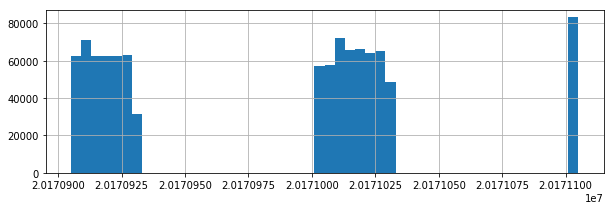

In [67]:
data.loc[:, 'date'].hist(bins=50, figsize=(10,3))
ax = plt.gca()  #获取当前ax 
ax.get_xaxis().get_major_formatter().set_useOffset(False)

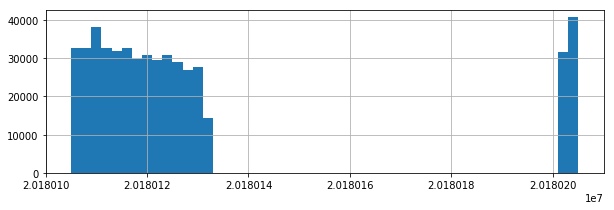

In [4]:
test_data.loc[:, 'date'].hist(bins=50, figsize=(10,3))
ax = plt.gca()  #获取当前ax 
ax.get_xaxis().get_major_formatter().set_useOffset(False)

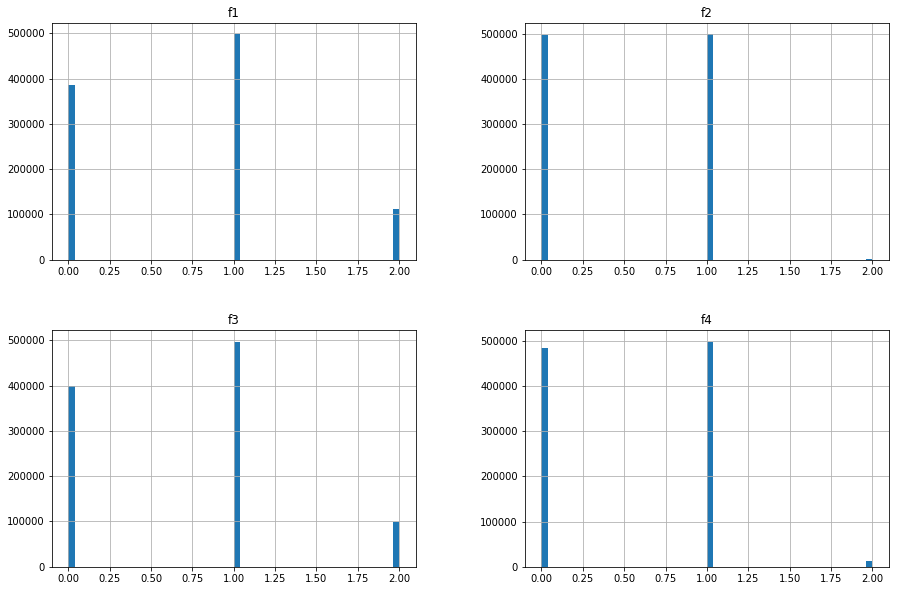

In [5]:
data.loc[:, 'f1':'f4'].hist(bins=50, figsize=(15,10))
#指定bin(箱子)的个数,也就是总共有几条条状图
plt.show()

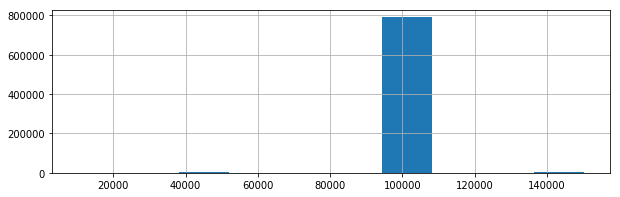

In [18]:
data.loc[:, 'f5'].hist(bins=10, figsize=(10,3))
plt.show()

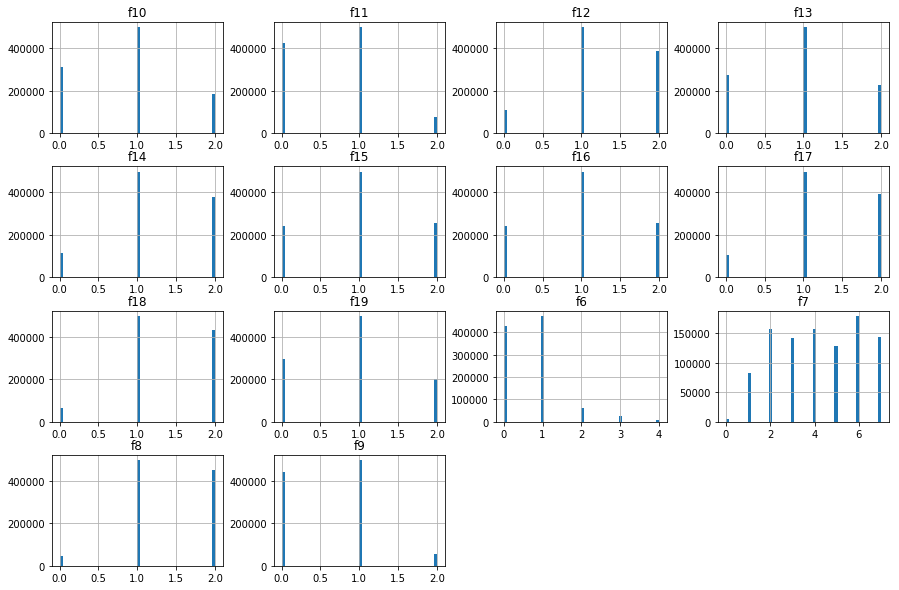

In [13]:
data.loc[:, 'f6':'f19'].hist(bins=50, figsize=(15,10))
plt.show()

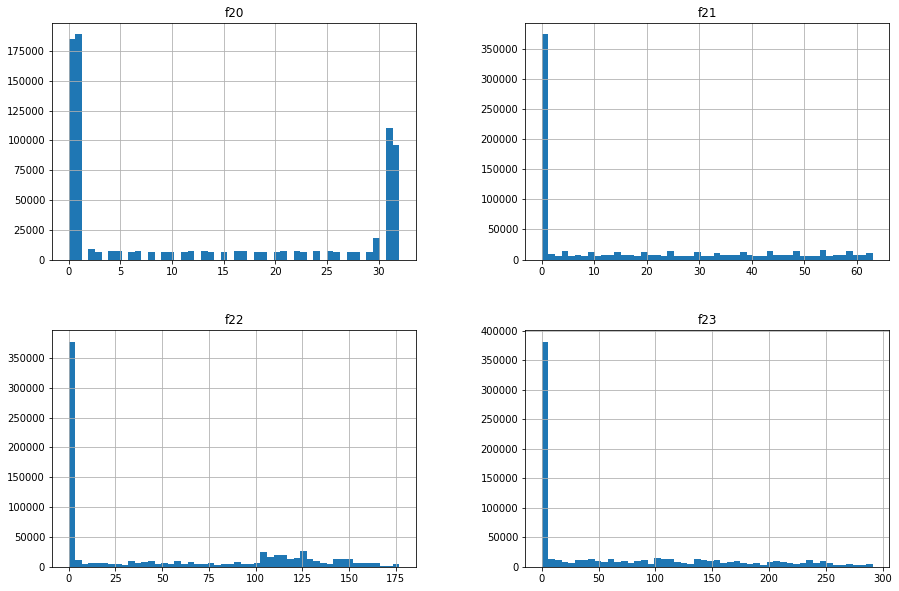

In [17]:
data.loc[:, 'f20':'f23'].hist(bins=50, figsize=(15,10))
plt.show()

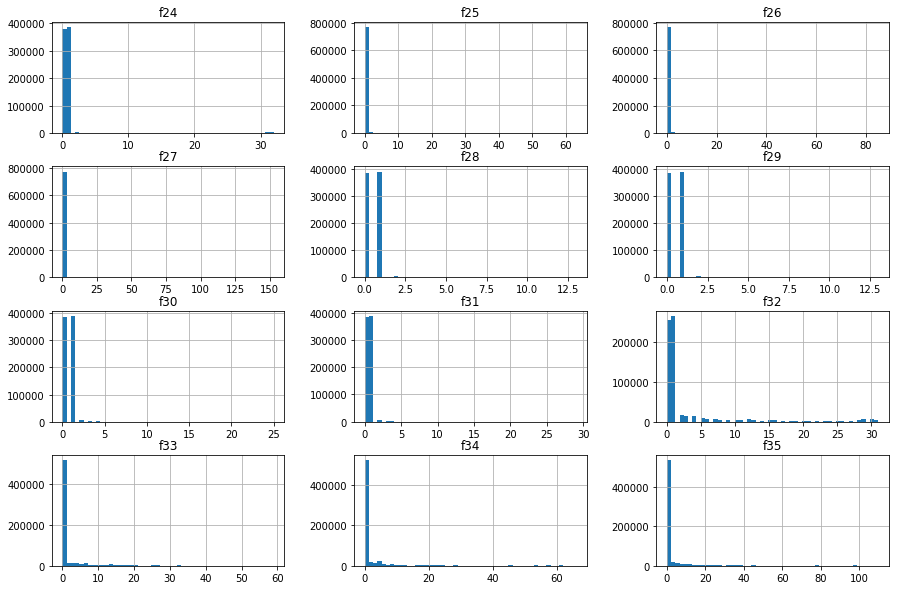

In [19]:
data.loc[:, 'f24':'f35'].hist(bins=50, figsize=(15,10))
plt.show()

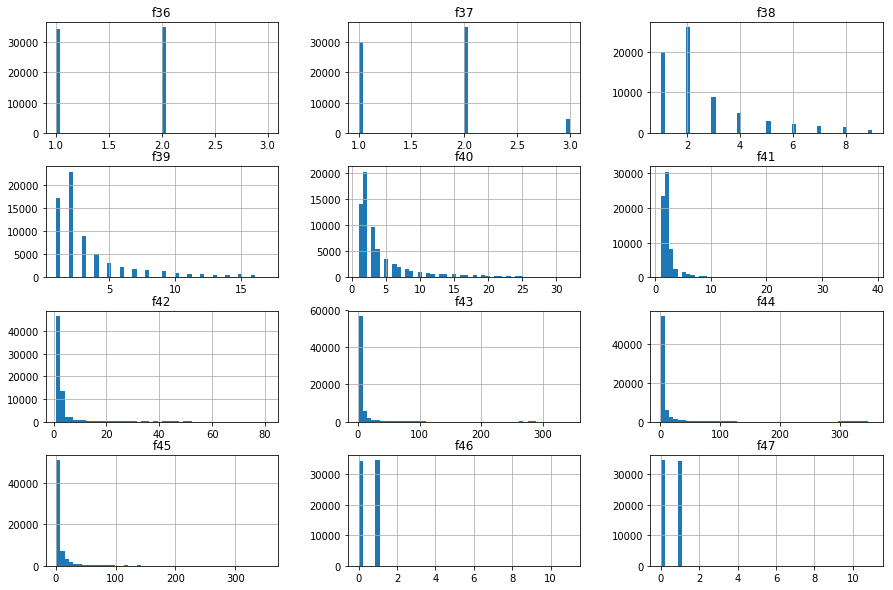

In [20]:
data.loc[:, 'f36':'f47'].hist(bins=50, figsize=(15,10))
plt.show()

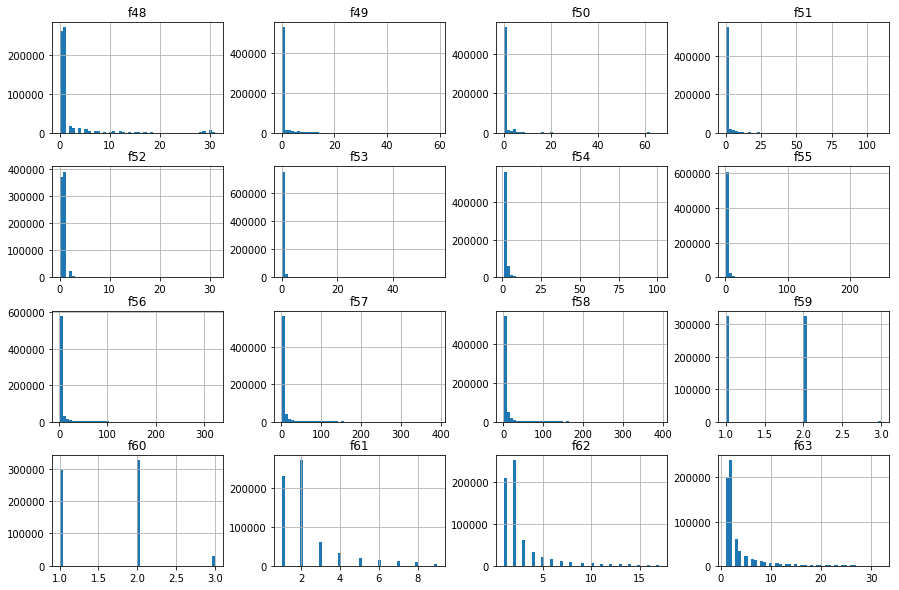

In [21]:
data.loc[:, 'f48':'f63'].hist(bins=50, figsize=(15,10))
plt.show()

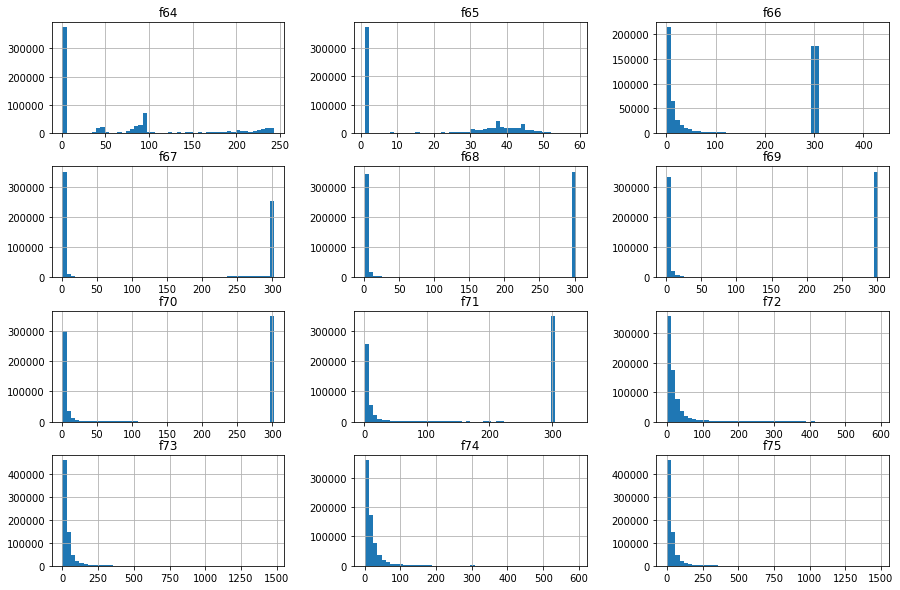

In [22]:
data.loc[:, 'f64':'f75'].hist(bins=50, figsize=(15,10))
plt.show()

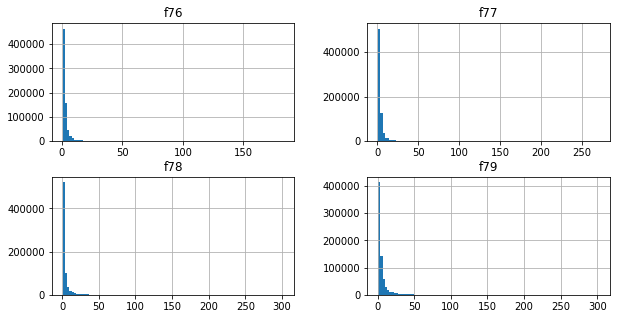

In [25]:
data.loc[:, 'f76':'f79'].hist(bins=100, figsize=(10,5))
plt.show()

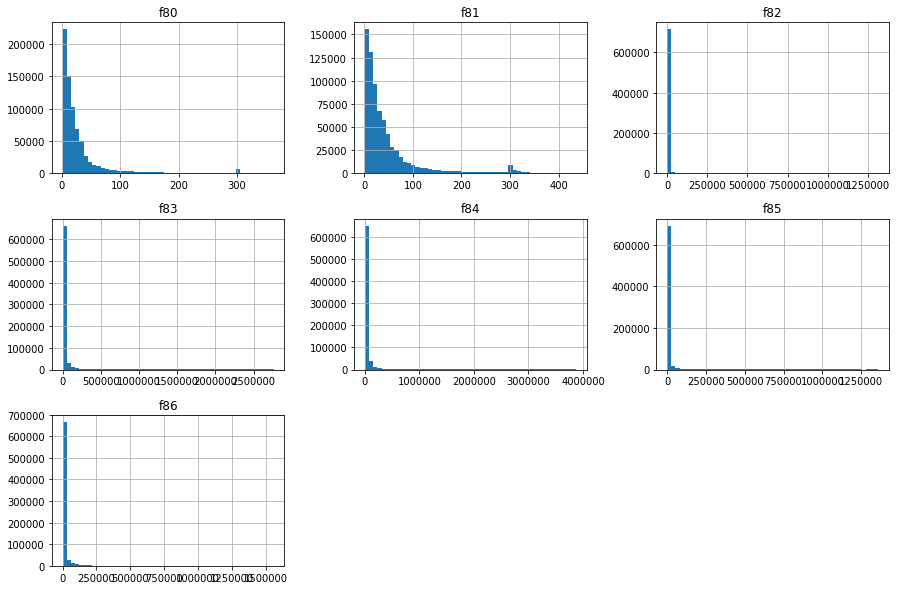

In [26]:
data.loc[:, 'f80':'f86'].hist(bins=50, figsize=(15,10))
plt.show()

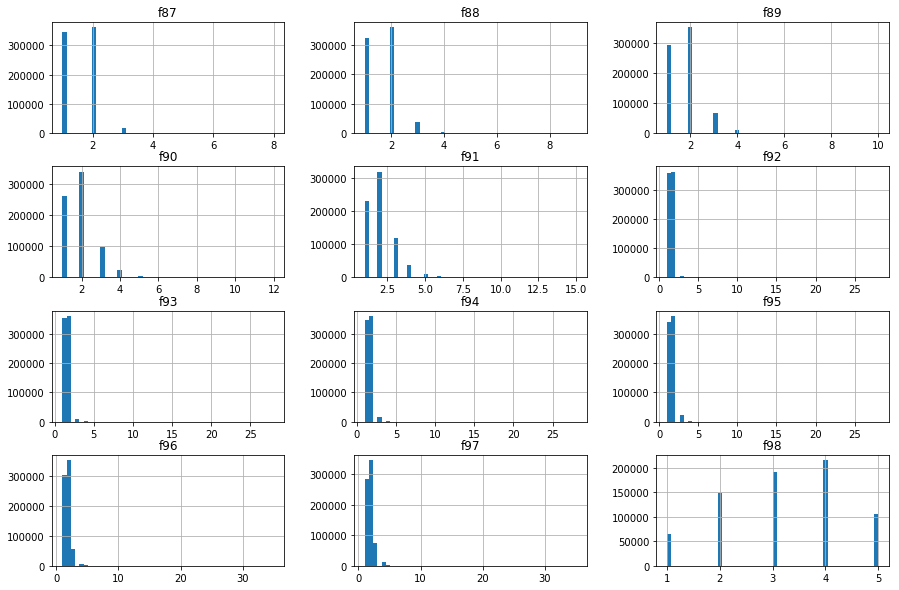

In [27]:
data.loc[:, 'f87':'f98'].hist(bins=50, figsize=(15,10))
plt.show()

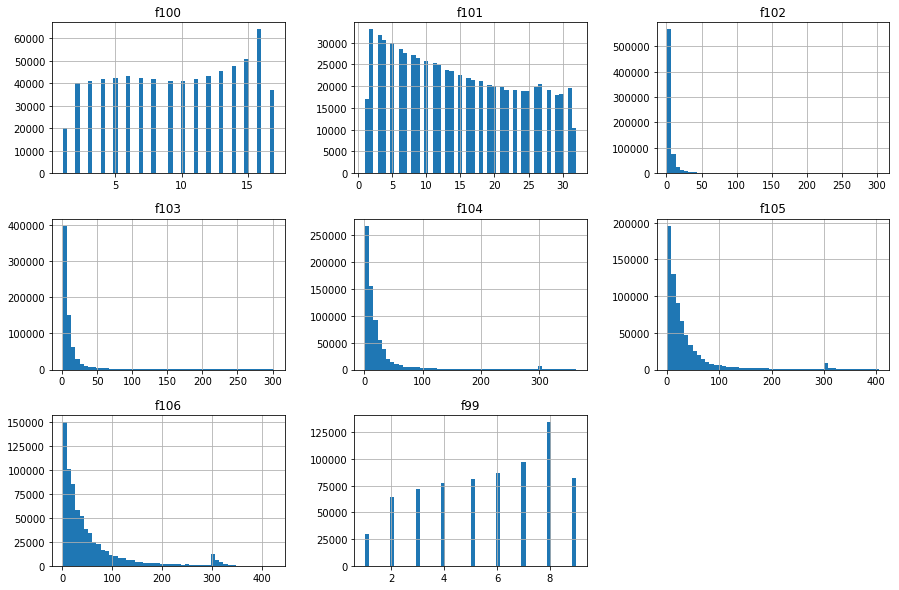

In [28]:
data.loc[:, 'f99':'f106'].hist(bins=50, figsize=(15,10))
plt.show()

In [29]:
data

id  label      date  \
0       f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   
1       d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   
2       1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   
3       9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   
4       1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   
5       81b481d377dc060f6c3249d086d28b0fb4c3781a72927d...      0  20171012   
6       cda7677920fc9bad4bb727ed8a87f59e3400572f75fd46...      0  20170927   
7       19d100ff146a203f0e558fd60534b8ece650be4ecb4564...      0  20171027   
8       49ff13e491c3e4c680cdf39e9b3b85560a4bb80994ac63...      0  20170926   
9       ee3adc3a1b88a30297f86cf77c0fcd1d5c17653f1a9828...      0  20171011   
10      741b5ae5f9f722faca496194ace8bc7920edb8fa1d4477...      0  20171104   
11      2739260b670d0656e3dd9c2709dd91da76677727d19470...      0  20171030   
12      fa592b16296ad2b2af574bca9d07a48cb2e5fc4e213a34...      0  20170916   
13      6970c7e69aaec5efba9d6daf130d9ff632bf2f714f5c44...      0  20171030   
14      2f9d65096a2a6590b7fceb30b4ef550aa3d706e604380d...      0  20171104   
15      50310c53c3c534d2020e20b938fa6726c00696fbd63a0a...      0  20170914   
16      14a021d3d08075aec2fc266dfc9d0718e458484db26ec5...      0  20171001   
17      767647b0d18f4984452dbf5197286d8f074b5963ab7adc...      0  20171005   
18      022b4b92c6b91cb41e7bd34c383e00041871e988f85909...      0  20171101   
19      058136f212efe3ccc0c07681edfea7a634397086bf6308...      0  20171027   
20      051bcc1a2f8be50b62e4ea3a8af9b516b9e6bd8480d2f2...      0  20171023   
21      81d9b6e197d2f874d0c7680e9fb792f2a7f472930aefe7...      0  20171102   
22      01ac29a6322547e0381f3ad1eea9ed6fc7981889a5c4d3...      0  20171003   
23      972573ab792de31c112846853e24a713241ab861c68c9a...      0  20171020   
24      5998a4a50355e864031037d6b86d8bfa87a091479f487b...      0  20170912   
25      686269890673416455a31e1e91d01cddbd6aab169468a4...      0  20170923   
26      6b624c296bf1da5aabd257c18cfbdb9ffc009b9b2e5537...      0  20170909   
27      5533954773050d2156801a4d800e7f35b7f63608d06f1a...      0  20171027   
28      fbffad5ce4131502592b4a09775507e87eb492f7d6de1e...      0  20170923   
29      398e5c7872881f5ce8d87c7c6d7a574bc09c175f5d0163...      0  20170922   
...                                                   ...    ...       ...   
994701  ea986a2755275f11b4c06e52b370c032e999f00e78bde4...      0  20170914   
994702  8c49bd1a2f630f737647332788da7e72fbb51db17ae88f...      0  20170919   
994703  ec9ccc3b2ddaa617aabff5a8ce374f7d07c4512d1ee1eb...      0  20171027   
994704  7bba8e82ff68648fd0990b1eb96cd80497c48bb85eb006...      0  20170921   
994705  f5d50784f83e23ae9bdd07dfe6f56a40964742509fe32e...      0  20171102   
994706  0183ba820231be9956942c67118b532e477b229b3f1557...      0  20171023   
994707  16ea431e06b7cb951441b5ee81ed192e4d8c5f5e681e49...      0  20170906   
994708  41c45a4b1fba95a3225a622c192ff82af14827fd99ed3c...      0  20171007   
994709  d4737dc0daf0dfba016edd4b2334d06a6466169b31e4f7...      0  20171022   
994710  fae59c01047ca2ef52796e1dcc6c005125c996913666dc...      0  20171102   
994711  8ac9648892dbc4096026ebcbf63e26ed02a9636bba7f0a...      0  20171026   
994712  c953c6cef92f200b7d8001003b5094641acdca7e46b00d...      0  20171013   
994713  0e45e4f73edc1c20edc5bda040a7fe8c474e07e27da097...      0  20171031   
994714  71d92d3fb0dfae3d7d9849f8072b2611a794c418328290...      0  20170922   
994715  2ade1f4c99e86ab506b8474c52a3000349079c3234a6b7...      0  20171013   
994716  35ce3a8118c7d6e590ab6d3948e945c4db981b4571caa3...      0  20170913   
994717  fb0bad620168e88c4f32ed61c661dea3605abd4410a819...      0  20171101   
994718  dc65bcf7f2b8eb047bde6a7410c90e08bdc71b936b3602...      0  20171101   
994719  475bd07bd8ff2c4c5b2428e9782515cd8373311a71373d...      0  20171031   
994720  422984c09c956d44b2c120823d6227414e500926d77ebe...      0  20171018   

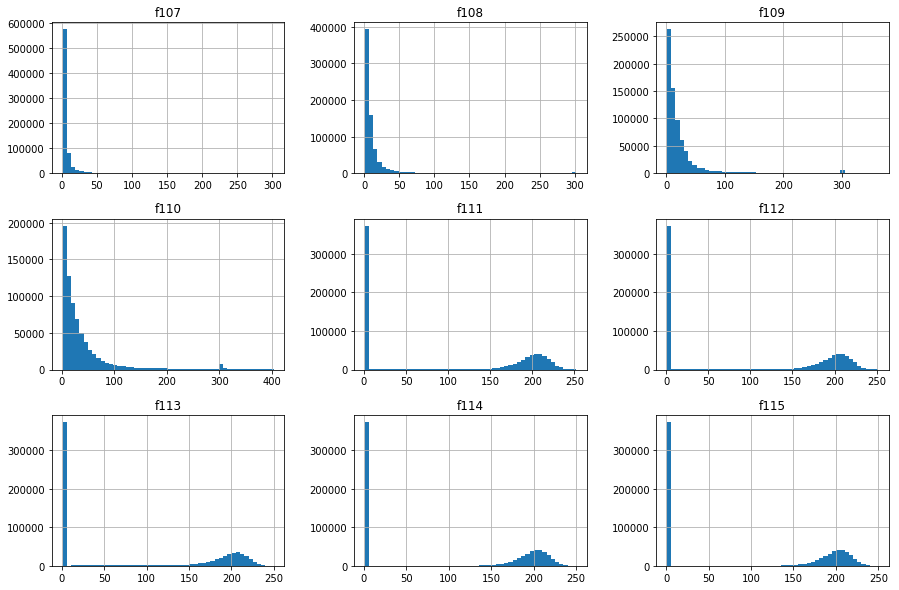

In [31]:
data.loc[:, 'f107':'f115'].hist(bins=50, figsize=(15,10))
plt.show()

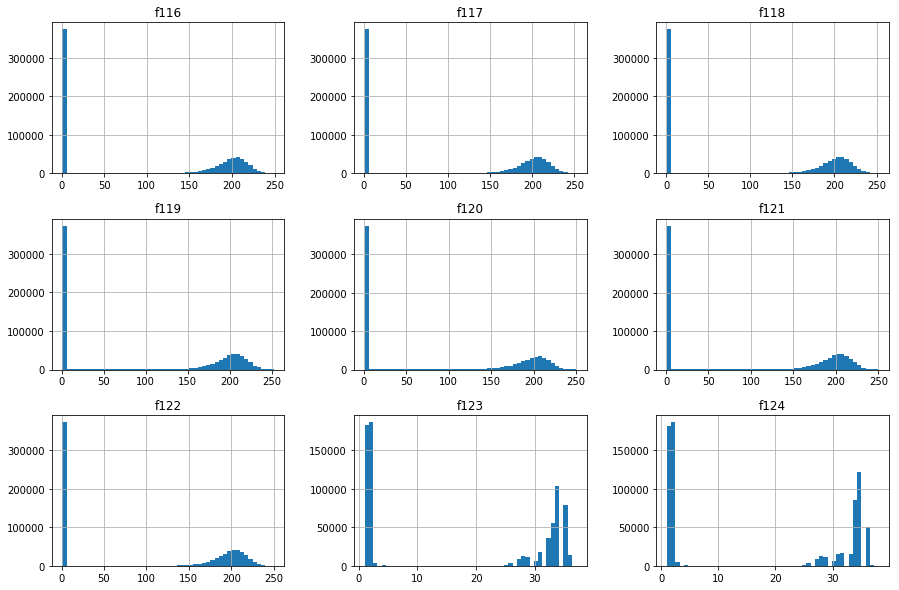

In [32]:
data.loc[:, 'f116':'f124'].hist(bins=50, figsize=(15,10))
plt.show()

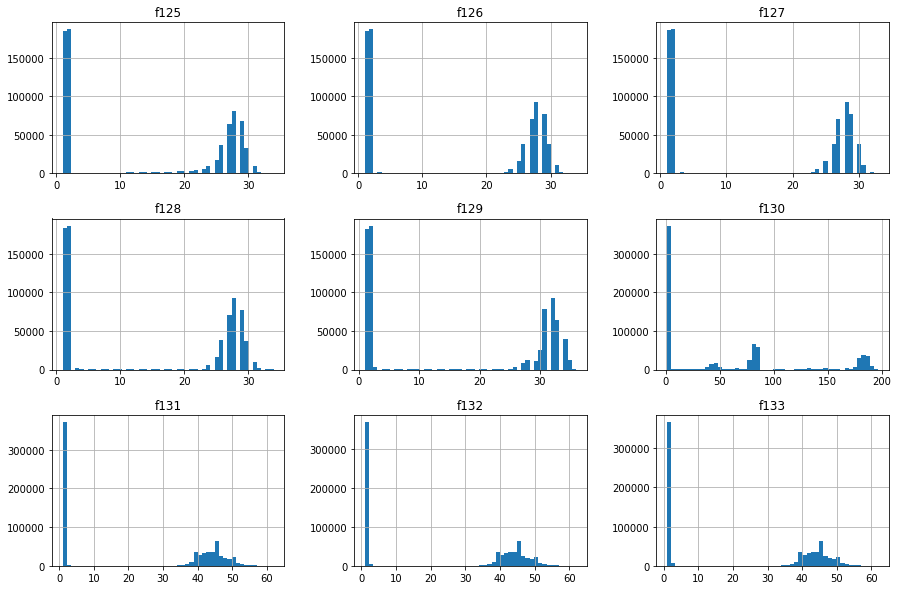

In [33]:
data.loc[:, 'f125':'f133'].hist(bins=50, figsize=(15,10))
plt.show()

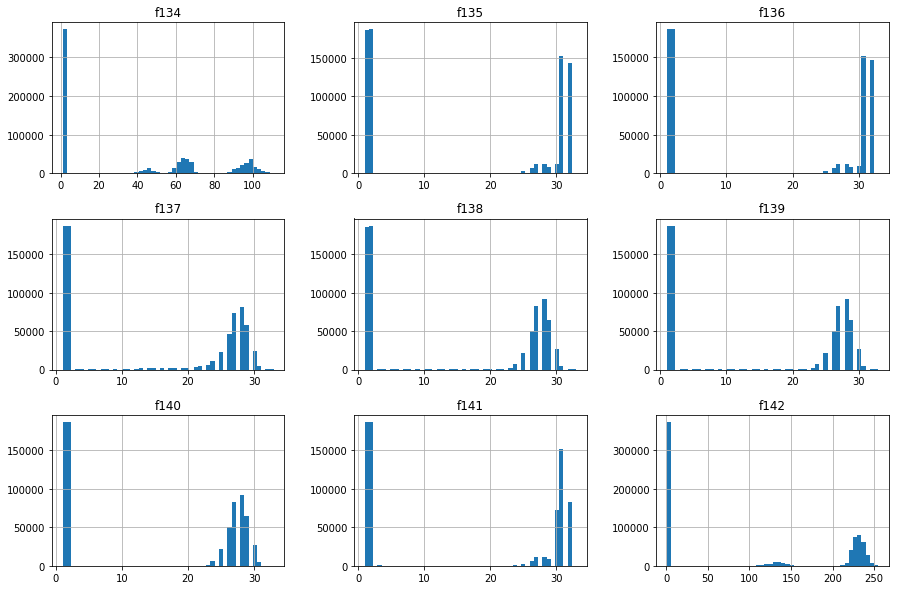

In [34]:
data.loc[:, 'f134':'f142'].hist(bins=50, figsize=(15,10))
plt.show()

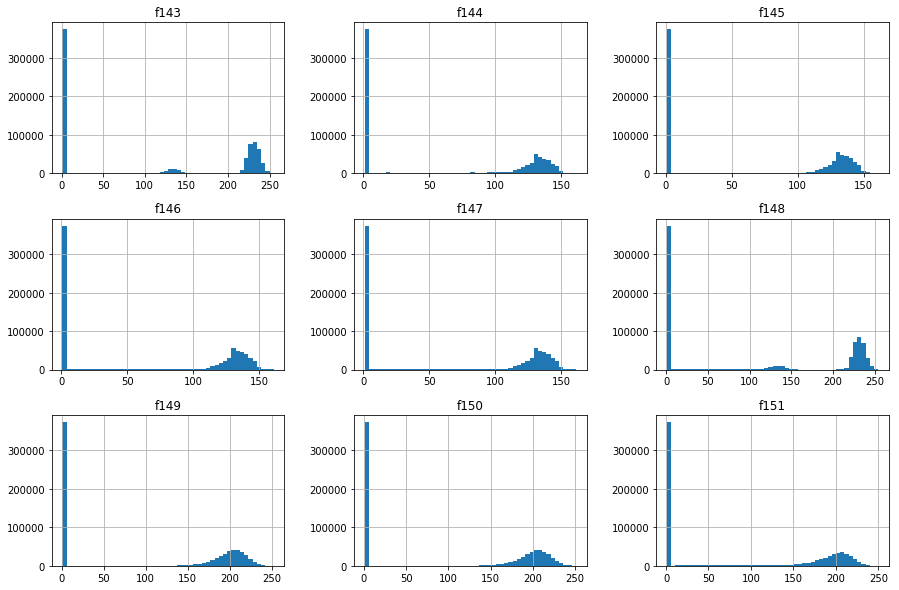

In [35]:
data.loc[:, 'f143':'f151'].hist(bins=50, figsize=(15,10))
plt.show()

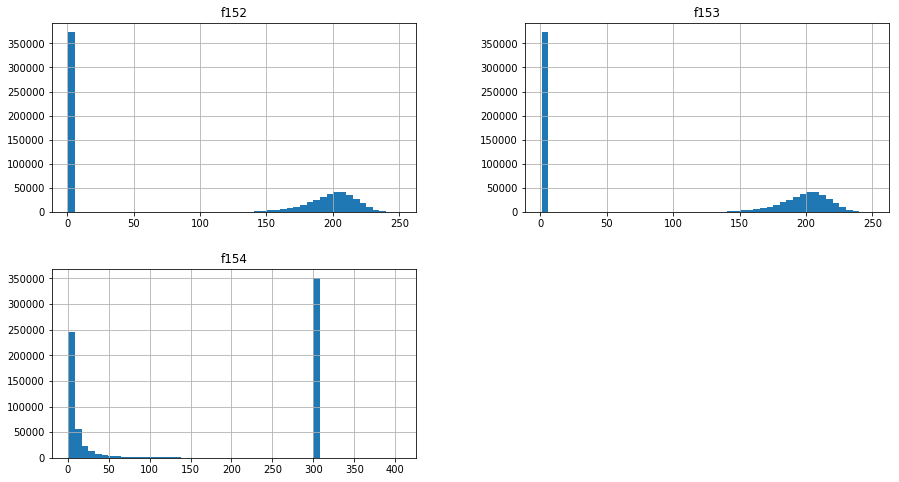

In [38]:
data.loc[:, 'f152':'f154'].hist(bins=50, figsize=(15,8))
plt.show()

In [39]:
data

id  label      date  \
0       f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   
1       d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   
2       1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   
3       9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   
4       1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   
5       81b481d377dc060f6c3249d086d28b0fb4c3781a72927d...      0  20171012   
6       cda7677920fc9bad4bb727ed8a87f59e3400572f75fd46...      0  20170927   
7       19d100ff146a203f0e558fd60534b8ece650be4ecb4564...      0  20171027   
8       49ff13e491c3e4c680cdf39e9b3b85560a4bb80994ac63...      0  20170926   
9       ee3adc3a1b88a30297f86cf77c0fcd1d5c17653f1a9828...      0  20171011   
10      741b5ae5f9f722faca496194ace8bc7920edb8fa1d4477...      0  20171104   
11      2739260b670d0656e3dd9c2709dd91da76677727d19470...      0  20171030   
12      fa592b16296ad2b2af574bca9d07a48cb2e5fc4e213a34...      0  20170916   
13      6970c7e69aaec5efba9d6daf130d9ff632bf2f714f5c44...      0  20171030   
14      2f9d65096a2a6590b7fceb30b4ef550aa3d706e604380d...      0  20171104   
15      50310c53c3c534d2020e20b938fa6726c00696fbd63a0a...      0  20170914   
16      14a021d3d08075aec2fc266dfc9d0718e458484db26ec5...      0  20171001   
17      767647b0d18f4984452dbf5197286d8f074b5963ab7adc...      0  20171005   
18      022b4b92c6b91cb41e7bd34c383e00041871e988f85909...      0  20171101   
19      058136f212efe3ccc0c07681edfea7a634397086bf6308...      0  20171027   
20      051bcc1a2f8be50b62e4ea3a8af9b516b9e6bd8480d2f2...      0  20171023   
21      81d9b6e197d2f874d0c7680e9fb792f2a7f472930aefe7...      0  20171102   
22      01ac29a6322547e0381f3ad1eea9ed6fc7981889a5c4d3...      0  20171003   
23      972573ab792de31c112846853e24a713241ab861c68c9a...      0  20171020   
24      5998a4a50355e864031037d6b86d8bfa87a091479f487b...      0  20170912   
25      686269890673416455a31e1e91d01cddbd6aab169468a4...      0  20170923   
26      6b624c296bf1da5aabd257c18cfbdb9ffc009b9b2e5537...      0  20170909   
27      5533954773050d2156801a4d800e7f35b7f63608d06f1a...      0  20171027   
28      fbffad5ce4131502592b4a09775507e87eb492f7d6de1e...      0  20170923   
29      398e5c7872881f5ce8d87c7c6d7a574bc09c175f5d0163...      0  20170922   
...                                                   ...    ...       ...   
994701  ea986a2755275f11b4c06e52b370c032e999f00e78bde4...      0  20170914   
994702  8c49bd1a2f630f737647332788da7e72fbb51db17ae88f...      0  20170919   
994703  ec9ccc3b2ddaa617aabff5a8ce374f7d07c4512d1ee1eb...      0  20171027   
994704  7bba8e82ff68648fd0990b1eb96cd80497c48bb85eb006...      0  20170921   
994705  f5d50784f83e23ae9bdd07dfe6f56a40964742509fe32e...      0  20171102   
994706  0183ba820231be9956942c67118b532e477b229b3f1557...      0  20171023   
994707  16ea431e06b7cb951441b5ee81ed192e4d8c5f5e681e49...      0  20170906   
994708  41c45a4b1fba95a3225a622c192ff82af14827fd99ed3c...      0  20171007   
994709  d4737dc0daf0dfba016edd4b2334d06a6466169b31e4f7...      0  20171022   
994710  fae59c01047ca2ef52796e1dcc6c005125c996913666dc...      0  20171102   
994711  8ac9648892dbc4096026ebcbf63e26ed02a9636bba7f0a...      0  20171026   
994712  c953c6cef92f200b7d8001003b5094641acdca7e46b00d...      0  20171013   
994713  0e45e4f73edc1c20edc5bda040a7fe8c474e07e27da097...      0  20171031   
994714  71d92d3fb0dfae3d7d9849f8072b2611a794c418328290...      0  20170922   
994715  2ade1f4c99e86ab506b8474c52a3000349079c3234a6b7...      0  20171013   
994716  35ce3a8118c7d6e590ab6d3948e945c4db981b4571caa3...      0  20170913   
994717  fb0bad620168e88c4f32ed61c661dea3605abd4410a819...      0  20171101   
994718  dc65bcf7f2b8eb047bde6a7410c90e08bdc71b936b3602...      0  20171101   
994719  475bd07bd8ff2c4c5b2428e9782515cd8373311a71373d...      0  20171031   
994720  422984c09c956d44b2c120823d6227414e500926d77ebe...      0  20171018   

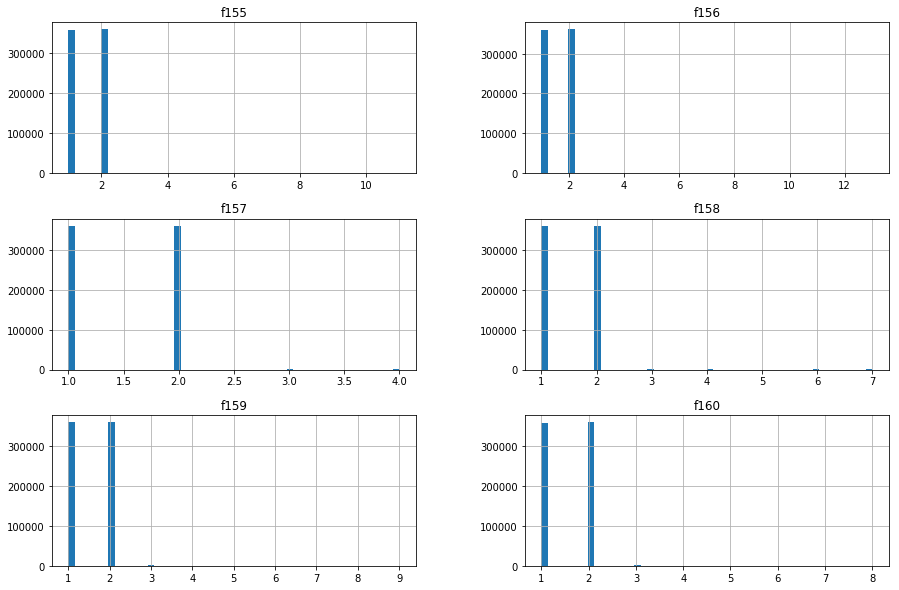

In [40]:
data.loc[:, 'f155':'f160'].hist(bins=50, figsize=(15,10))
plt.show()

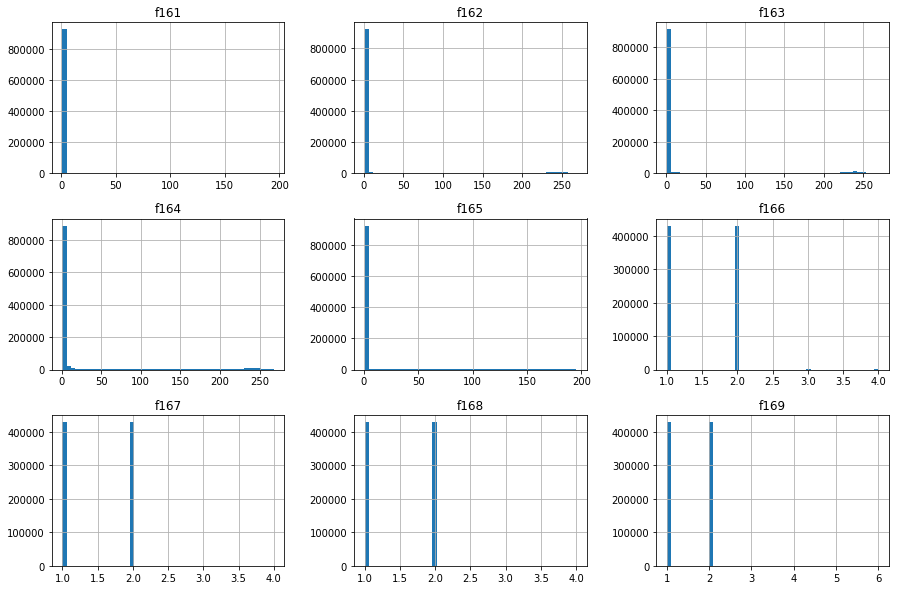

In [41]:
data.loc[:, 'f161':'f169'].hist(bins=50, figsize=(15,10))
plt.show()

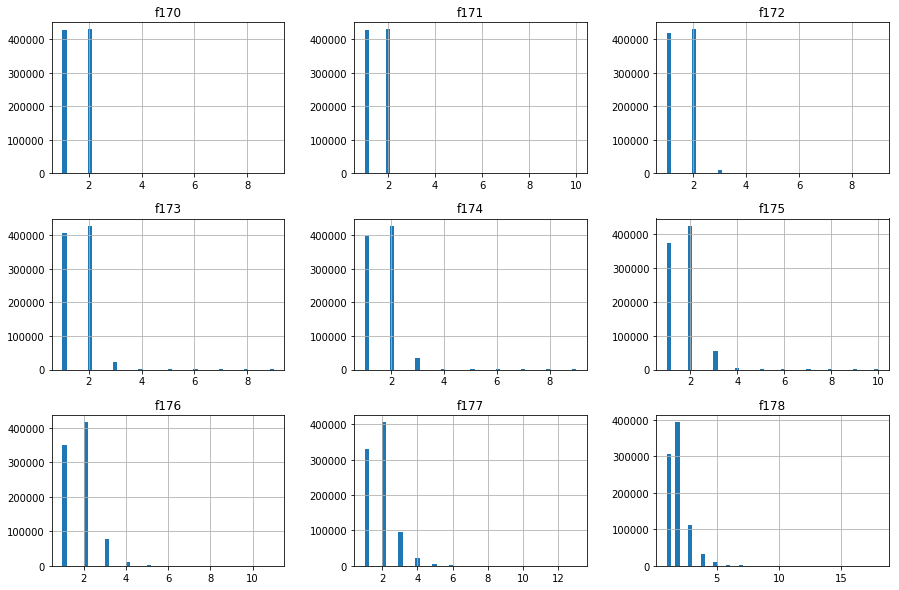

In [42]:
data.loc[:, 'f170':'f178'].hist(bins=50, figsize=(15,10))
plt.show()

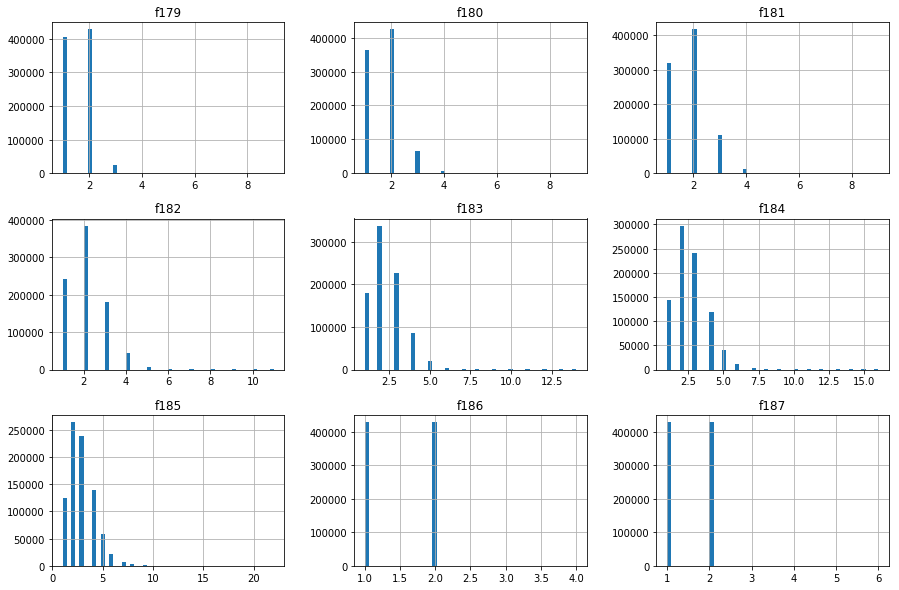

In [43]:
data.loc[:, 'f179':'f187'].hist(bins=50, figsize=(15,10))
plt.show()

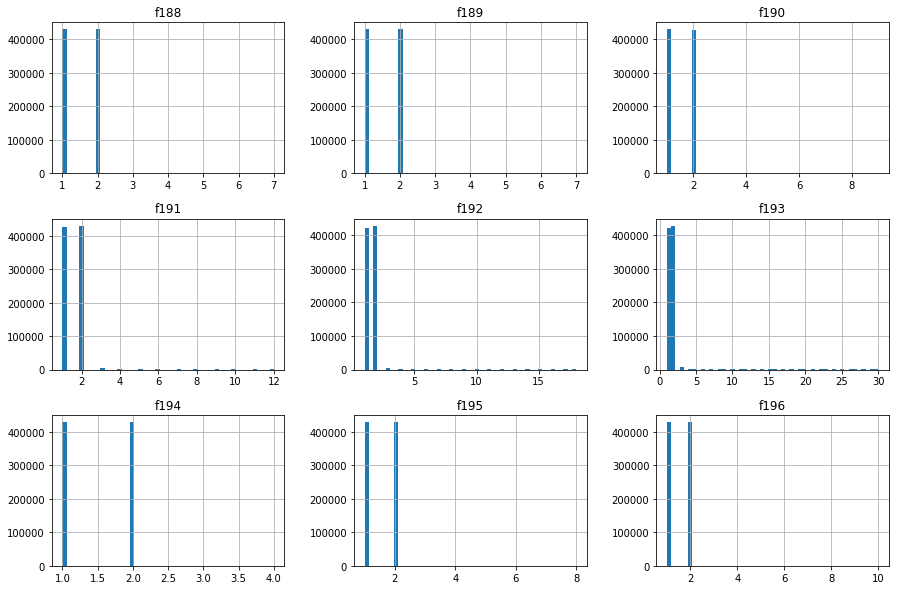

In [44]:
data.loc[:, 'f188':'f196'].hist(bins=50, figsize=(15,10))
plt.show()

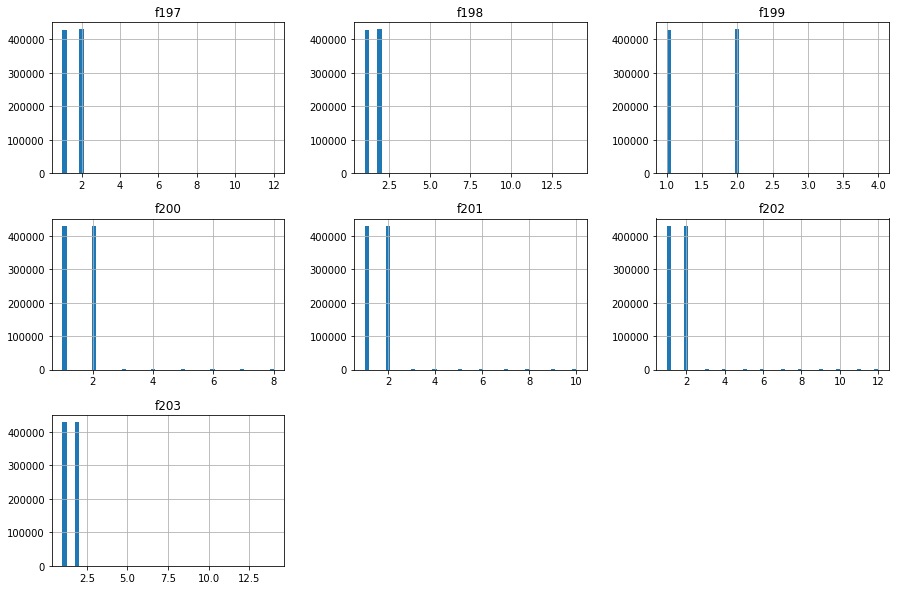

In [45]:
data.loc[:, 'f197':'f203'].hist(bins=50, figsize=(15,10))
plt.show()

In [46]:
data

id  label      date  \
0       f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   
1       d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   
2       1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   
3       9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   
4       1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   
5       81b481d377dc060f6c3249d086d28b0fb4c3781a72927d...      0  20171012   
6       cda7677920fc9bad4bb727ed8a87f59e3400572f75fd46...      0  20170927   
7       19d100ff146a203f0e558fd60534b8ece650be4ecb4564...      0  20171027   
8       49ff13e491c3e4c680cdf39e9b3b85560a4bb80994ac63...      0  20170926   
9       ee3adc3a1b88a30297f86cf77c0fcd1d5c17653f1a9828...      0  20171011   
10      741b5ae5f9f722faca496194ace8bc7920edb8fa1d4477...      0  20171104   
11      2739260b670d0656e3dd9c2709dd91da76677727d19470...      0  20171030   
12      fa592b16296ad2b2af574bca9d07a48cb2e5fc4e213a34...      0  20170916   
13      6970c7e69aaec5efba9d6daf130d9ff632bf2f714f5c44...      0  20171030   
14      2f9d65096a2a6590b7fceb30b4ef550aa3d706e604380d...      0  20171104   
15      50310c53c3c534d2020e20b938fa6726c00696fbd63a0a...      0  20170914   
16      14a021d3d08075aec2fc266dfc9d0718e458484db26ec5...      0  20171001   
17      767647b0d18f4984452dbf5197286d8f074b5963ab7adc...      0  20171005   
18      022b4b92c6b91cb41e7bd34c383e00041871e988f85909...      0  20171101   
19      058136f212efe3ccc0c07681edfea7a634397086bf6308...      0  20171027   
20      051bcc1a2f8be50b62e4ea3a8af9b516b9e6bd8480d2f2...      0  20171023   
21      81d9b6e197d2f874d0c7680e9fb792f2a7f472930aefe7...      0  20171102   
22      01ac29a6322547e0381f3ad1eea9ed6fc7981889a5c4d3...      0  20171003   
23      972573ab792de31c112846853e24a713241ab861c68c9a...      0  20171020   
24      5998a4a50355e864031037d6b86d8bfa87a091479f487b...      0  20170912   
25      686269890673416455a31e1e91d01cddbd6aab169468a4...      0  20170923   
26      6b624c296bf1da5aabd257c18cfbdb9ffc009b9b2e5537...      0  20170909   
27      5533954773050d2156801a4d800e7f35b7f63608d06f1a...      0  20171027   
28      fbffad5ce4131502592b4a09775507e87eb492f7d6de1e...      0  20170923   
29      398e5c7872881f5ce8d87c7c6d7a574bc09c175f5d0163...      0  20170922   
...                                                   ...    ...       ...   
994701  ea986a2755275f11b4c06e52b370c032e999f00e78bde4...      0  20170914   
994702  8c49bd1a2f630f737647332788da7e72fbb51db17ae88f...      0  20170919   
994703  ec9ccc3b2ddaa617aabff5a8ce374f7d07c4512d1ee1eb...      0  20171027   
994704  7bba8e82ff68648fd0990b1eb96cd80497c48bb85eb006...      0  20170921   
994705  f5d50784f83e23ae9bdd07dfe6f56a40964742509fe32e...      0  20171102   
994706  0183ba820231be9956942c67118b532e477b229b3f1557...      0  20171023   
994707  16ea431e06b7cb951441b5ee81ed192e4d8c5f5e681e49...      0  20170906   
994708  41c45a4b1fba95a3225a622c192ff82af14827fd99ed3c...      0  20171007   
994709  d4737dc0daf0dfba016edd4b2334d06a6466169b31e4f7...      0  20171022   
994710  fae59c01047ca2ef52796e1dcc6c005125c996913666dc...      0  20171102   
994711  8ac9648892dbc4096026ebcbf63e26ed02a9636bba7f0a...      0  20171026   
994712  c953c6cef92f200b7d8001003b5094641acdca7e46b00d...      0  20171013   
994713  0e45e4f73edc1c20edc5bda040a7fe8c474e07e27da097...      0  20171031   
994714  71d92d3fb0dfae3d7d9849f8072b2611a794c418328290...      0  20170922   
994715  2ade1f4c99e86ab506b8474c52a3000349079c3234a6b7...      0  20171013   
994716  35ce3a8118c7d6e590ab6d3948e945c4db981b4571caa3...      0  20170913   
994717  fb0bad620168e88c4f32ed61c661dea3605abd4410a819...      0  20171101   
994718  dc65bcf7f2b8eb047bde6a7410c90e08bdc71b936b3602...      0  20171101   
994719  475bd07bd8ff2c4c5b2428e9782515cd8373311a71373d...      0  20171031   
994720  422984c09c956d44b2c120823d6227414e500926d77ebe...      0  20171018   

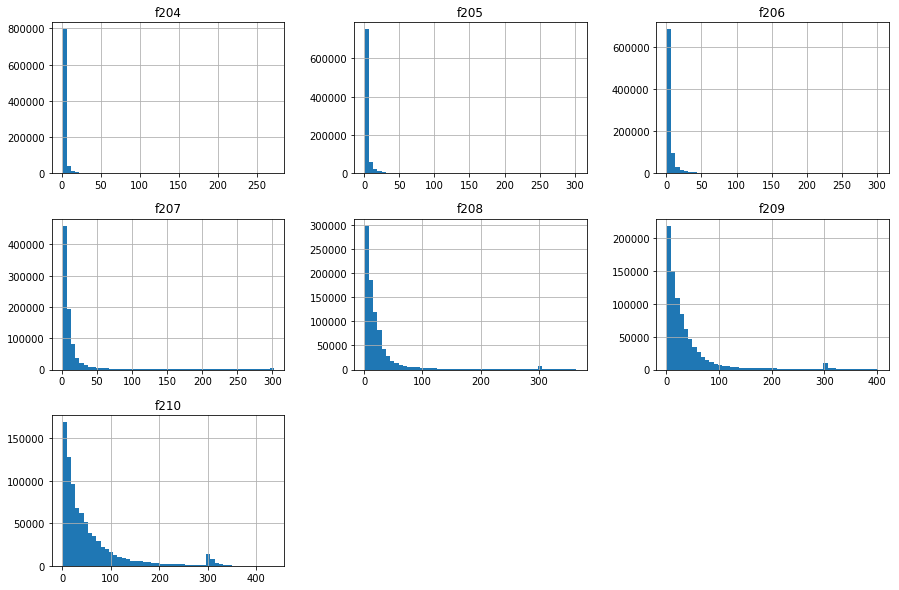

In [47]:
data.loc[:, 'f204':'f210'].hist(bins=50, figsize=(15,10))
plt.show()

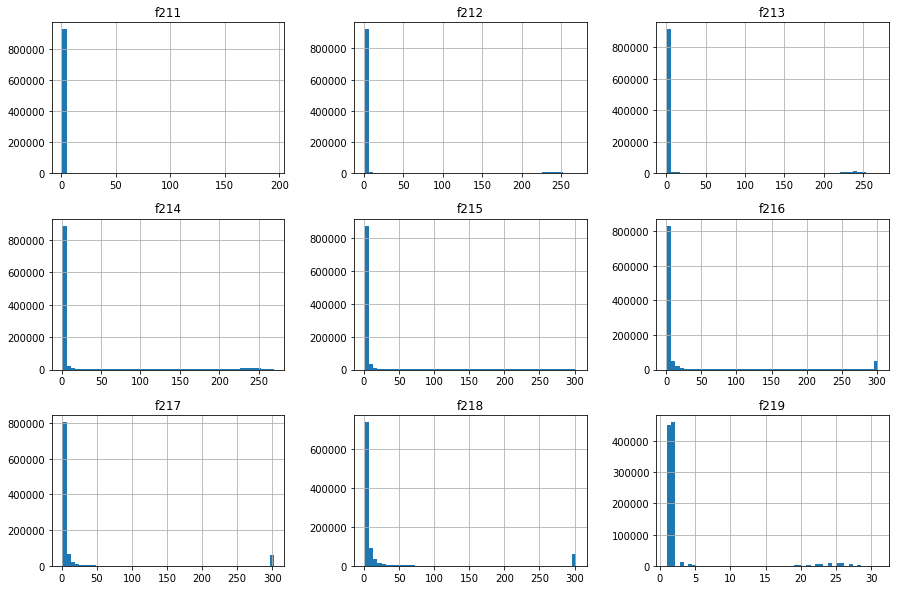

In [48]:
data.loc[:, 'f211':'f219'].hist(bins=50, figsize=(15,10))
plt.show()

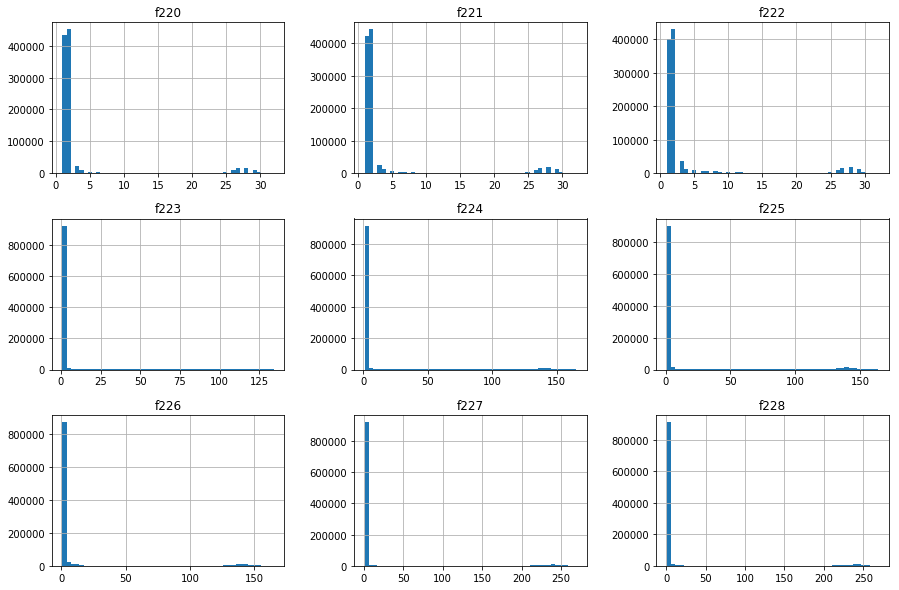

In [49]:
data.loc[:, 'f220':'f228'].hist(bins=50, figsize=(15,10))
plt.show()

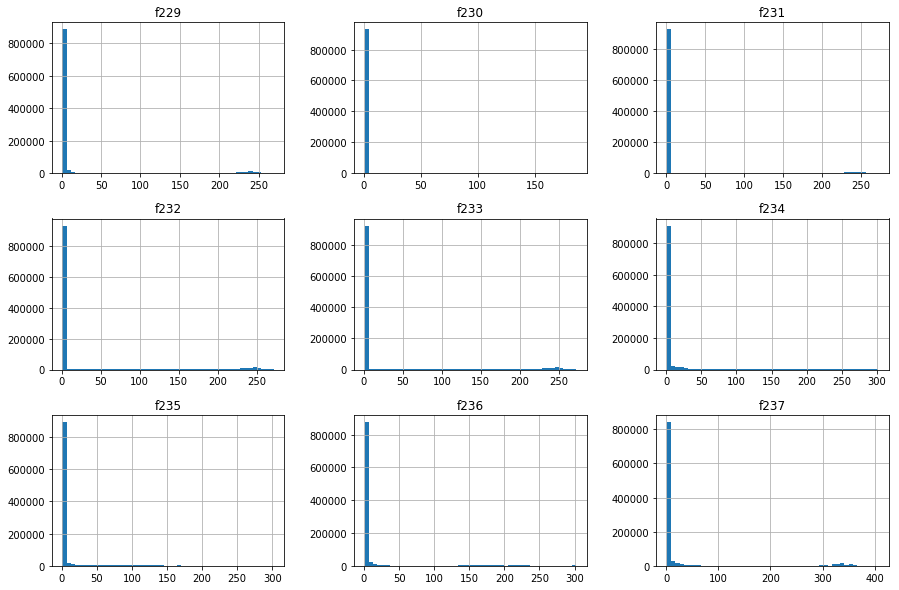

In [50]:
data.loc[:, 'f229':'f237'].hist(bins=50, figsize=(15,10))
plt.show()

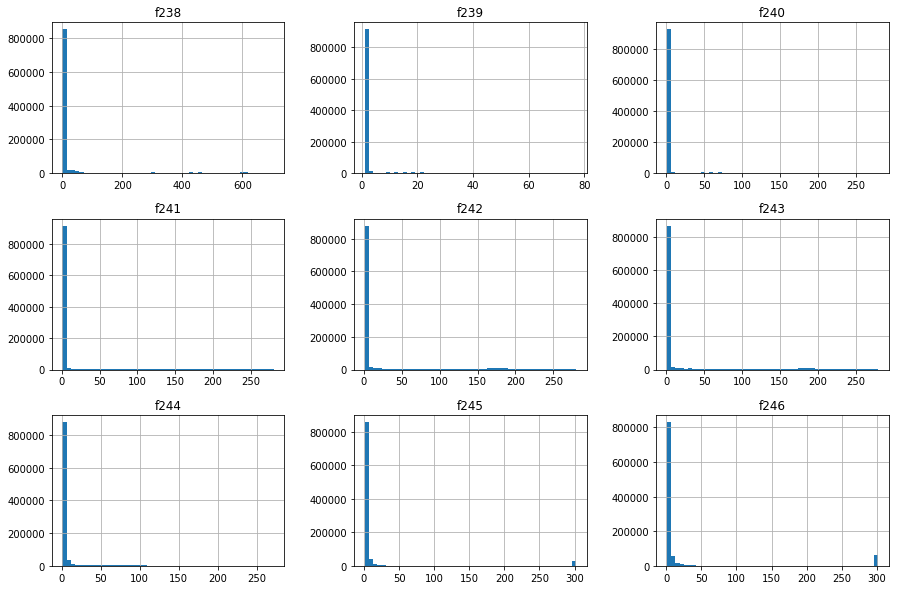

In [51]:
data.loc[:, 'f238':'f246'].hist(bins=50, figsize=(15,10))
plt.show()

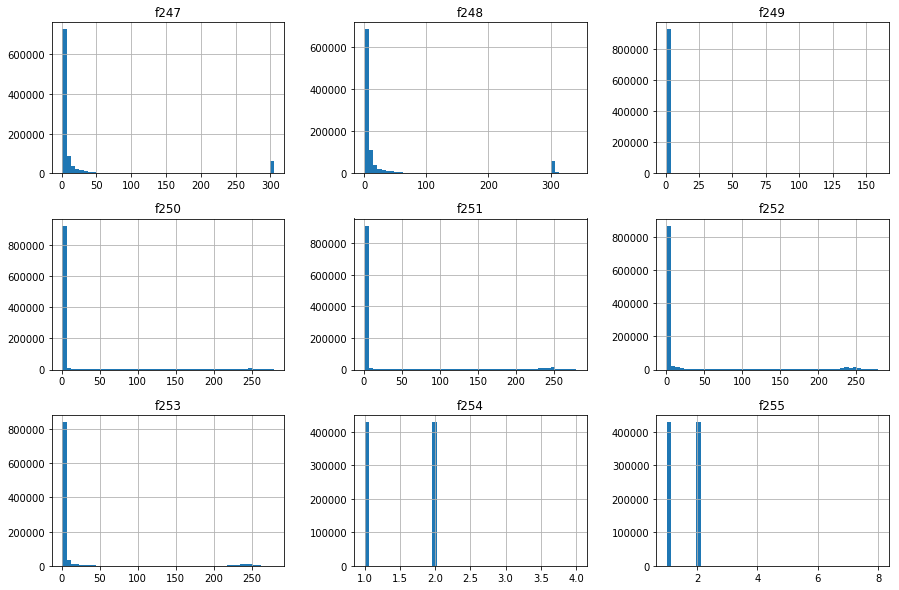

In [52]:
data.loc[:, 'f247':'f255'].hist(bins=50, figsize=(15,10))
plt.show()

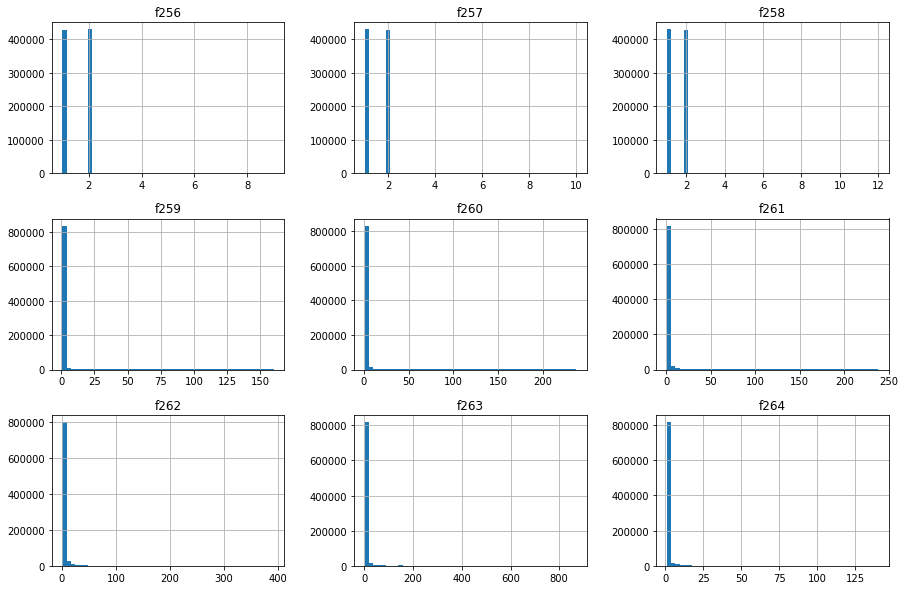

In [53]:
data.loc[:, 'f256':'f264'].hist(bins=50, figsize=(15,10))
plt.show()

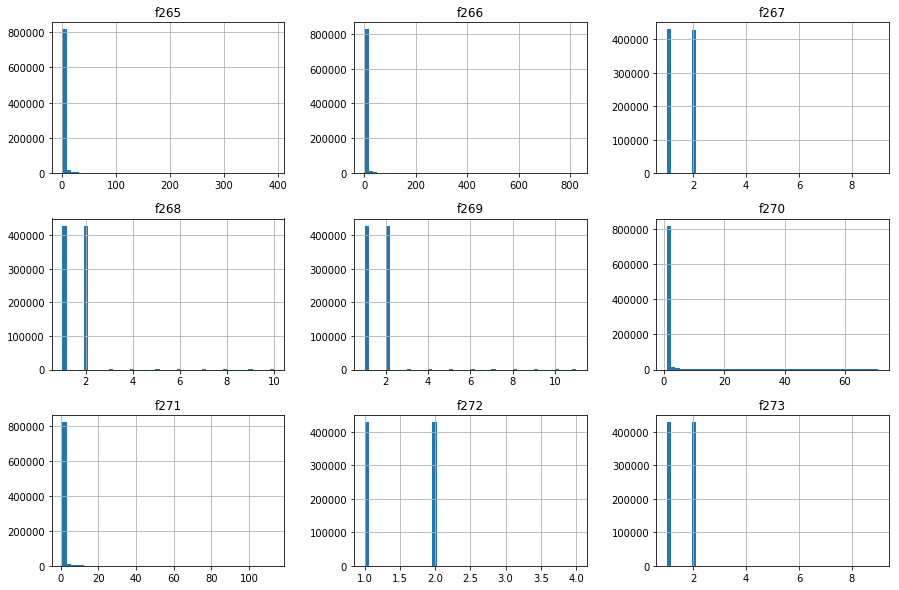

In [54]:
data.loc[:, 'f265':'f273'].hist(bins=50, figsize=(15,10))
plt.show()

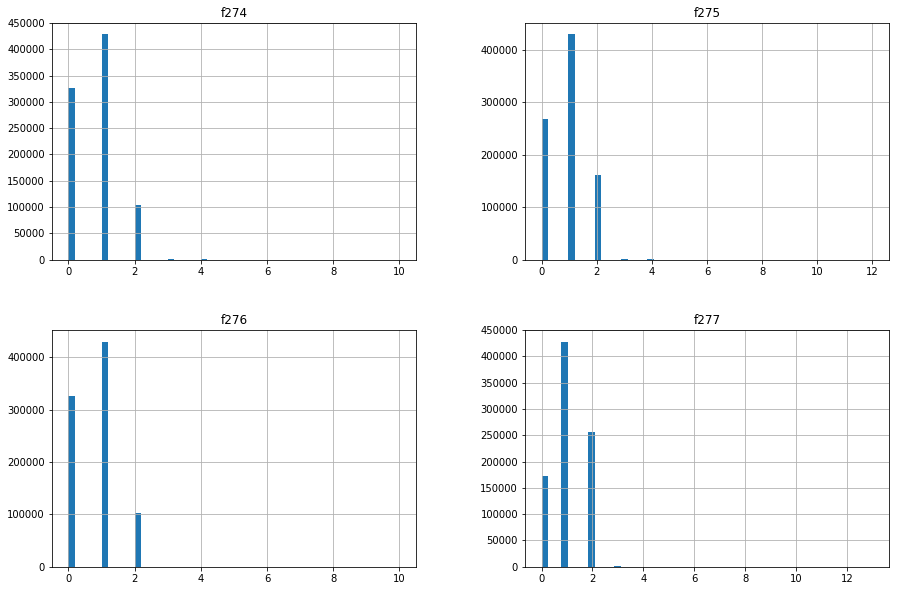

In [55]:
data.loc[:, 'f274':'f277'].hist(bins=50, figsize=(15,10))
plt.show()

In [56]:
data

id  label      date  \
0       f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   
1       d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   
2       1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   
3       9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   
4       1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   
5       81b481d377dc060f6c3249d086d28b0fb4c3781a72927d...      0  20171012   
6       cda7677920fc9bad4bb727ed8a87f59e3400572f75fd46...      0  20170927   
7       19d100ff146a203f0e558fd60534b8ece650be4ecb4564...      0  20171027   
8       49ff13e491c3e4c680cdf39e9b3b85560a4bb80994ac63...      0  20170926   
9       ee3adc3a1b88a30297f86cf77c0fcd1d5c17653f1a9828...      0  20171011   
10      741b5ae5f9f722faca496194ace8bc7920edb8fa1d4477...      0  20171104   
11      2739260b670d0656e3dd9c2709dd91da76677727d19470...      0  20171030   
12      fa592b16296ad2b2af574bca9d07a48cb2e5fc4e213a34...      0  20170916   
13      6970c7e69aaec5efba9d6daf130d9ff632bf2f714f5c44...      0  20171030   
14      2f9d65096a2a6590b7fceb30b4ef550aa3d706e604380d...      0  20171104   
15      50310c53c3c534d2020e20b938fa6726c00696fbd63a0a...      0  20170914   
16      14a021d3d08075aec2fc266dfc9d0718e458484db26ec5...      0  20171001   
17      767647b0d18f4984452dbf5197286d8f074b5963ab7adc...      0  20171005   
18      022b4b92c6b91cb41e7bd34c383e00041871e988f85909...      0  20171101   
19      058136f212efe3ccc0c07681edfea7a634397086bf6308...      0  20171027   
20      051bcc1a2f8be50b62e4ea3a8af9b516b9e6bd8480d2f2...      0  20171023   
21      81d9b6e197d2f874d0c7680e9fb792f2a7f472930aefe7...      0  20171102   
22      01ac29a6322547e0381f3ad1eea9ed6fc7981889a5c4d3...      0  20171003   
23      972573ab792de31c112846853e24a713241ab861c68c9a...      0  20171020   
24      5998a4a50355e864031037d6b86d8bfa87a091479f487b...      0  20170912   
25      686269890673416455a31e1e91d01cddbd6aab169468a4...      0  20170923   
26      6b624c296bf1da5aabd257c18cfbdb9ffc009b9b2e5537...      0  20170909   
27      5533954773050d2156801a4d800e7f35b7f63608d06f1a...      0  20171027   
28      fbffad5ce4131502592b4a09775507e87eb492f7d6de1e...      0  20170923   
29      398e5c7872881f5ce8d87c7c6d7a574bc09c175f5d0163...      0  20170922   
...                                                   ...    ...       ...   
994701  ea986a2755275f11b4c06e52b370c032e999f00e78bde4...      0  20170914   
994702  8c49bd1a2f630f737647332788da7e72fbb51db17ae88f...      0  20170919   
994703  ec9ccc3b2ddaa617aabff5a8ce374f7d07c4512d1ee1eb...      0  20171027   
994704  7bba8e82ff68648fd0990b1eb96cd80497c48bb85eb006...      0  20170921   
994705  f5d50784f83e23ae9bdd07dfe6f56a40964742509fe32e...      0  20171102   
994706  0183ba820231be9956942c67118b532e477b229b3f1557...      0  20171023   
994707  16ea431e06b7cb951441b5ee81ed192e4d8c5f5e681e49...      0  20170906   
994708  41c45a4b1fba95a3225a622c192ff82af14827fd99ed3c...      0  20171007   
994709  d4737dc0daf0dfba016edd4b2334d06a6466169b31e4f7...      0  20171022   
994710  fae59c01047ca2ef52796e1dcc6c005125c996913666dc...      0  20171102   
994711  8ac9648892dbc4096026ebcbf63e26ed02a9636bba7f0a...      0  20171026   
994712  c953c6cef92f200b7d8001003b5094641acdca7e46b00d...      0  20171013   
994713  0e45e4f73edc1c20edc5bda040a7fe8c474e07e27da097...      0  20171031   
994714  71d92d3fb0dfae3d7d9849f8072b2611a794c418328290...      0  20170922   
994715  2ade1f4c99e86ab506b8474c52a3000349079c3234a6b7...      0  20171013   
994716  35ce3a8118c7d6e590ab6d3948e945c4db981b4571caa3...      0  20170913   
994717  fb0bad620168e88c4f32ed61c661dea3605abd4410a819...      0  20171101   
994718  dc65bcf7f2b8eb047bde6a7410c90e08bdc71b936b3602...      0  20171101   
994719  475bd07bd8ff2c4c5b2428e9782515cd8373311a71373d...      0  20171031   
994720  422984c09c956d44b2c120823d6227414e500926d77ebe...      0  20171018   

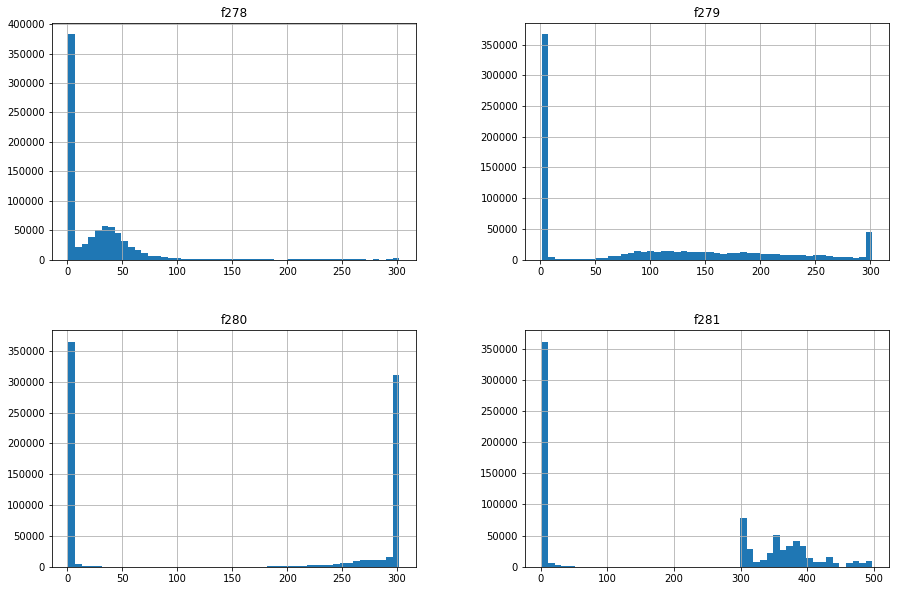

In [58]:
data.loc[:, 'f278':'f281'].hist(bins=50, figsize=(15,10))
plt.show()

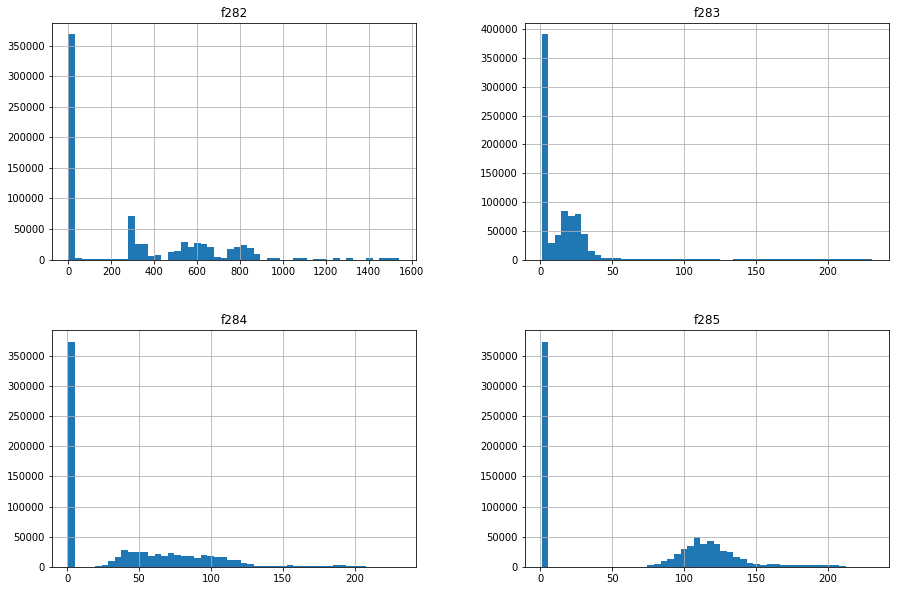

In [59]:
data.loc[:, 'f282':'f285'].hist(bins=50, figsize=(15,10))
plt.show()

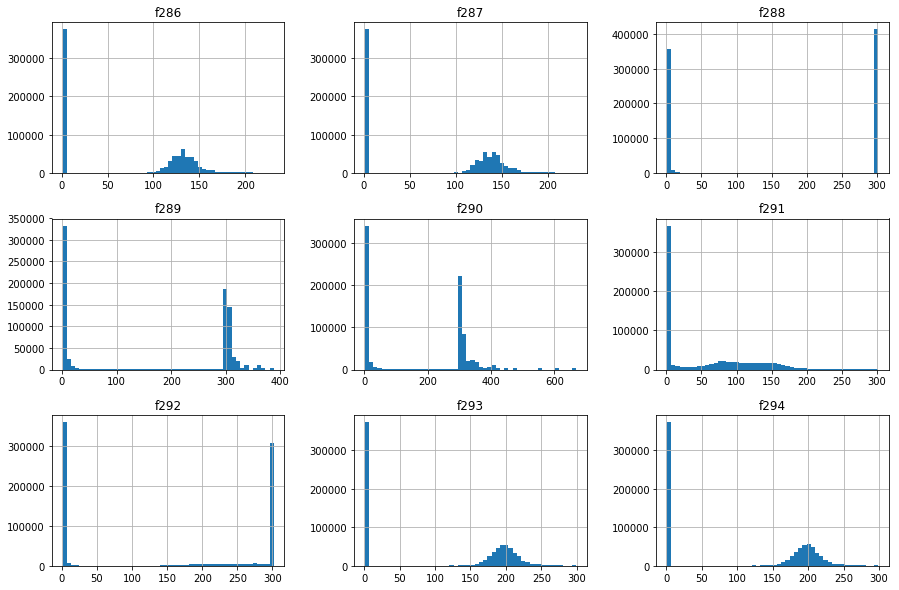

In [60]:
data.loc[:, 'f286':'f294'].hist(bins=50, figsize=(15,10))
plt.show()

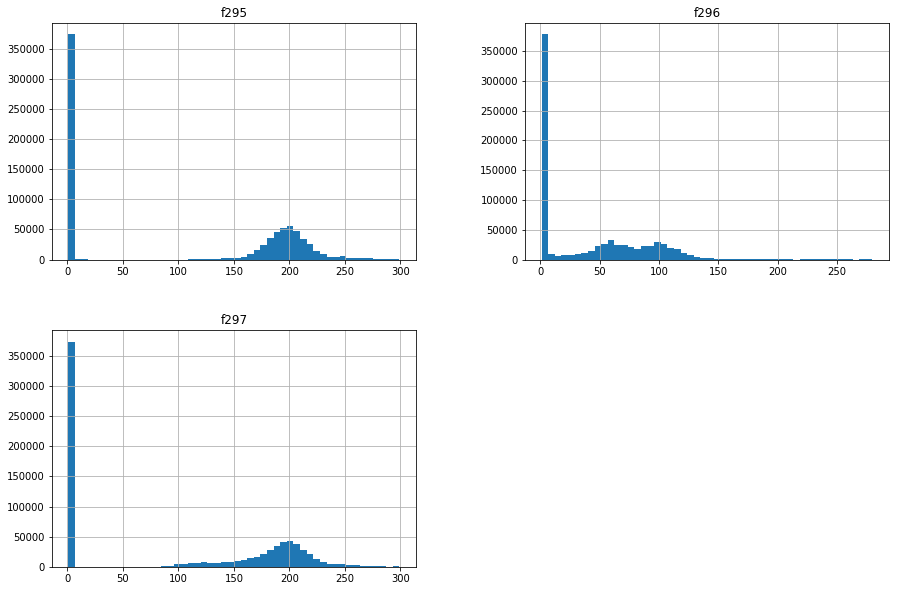

In [61]:
data.loc[:, 'f295':].hist(bins=50, figsize=(15,10))
plt.show()